# Import the Dependencies

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection

In [2]:
d = pd.read_csv("C:\\Users\\Gauri Mohite\\Documents\sale.csv")
d.head()

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,...,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE
0,22,124,11986.54,96.67,529.59,4.27,30-Dec-16,24-Oct-21,14.19,1,...,2592.18,2409.71,12,61,37,14,1067.92,5674.65,3916.53,1327.44
1,29,82,11025.96,134.46,97.92,1.19,31-Mar-18,24-Oct-21,15.89,1,...,2807.66,4106.19,1,13,24,44,30.25,3143.69,2205.47,5646.55
2,83,43,7259.69,168.83,171.69,3.99,30-Nov-17,24-Oct-21,33.12,1,...,713.94,2861.90,0,6,12,25,0.00,707.98,2560.91,3990.80
3,95,44,6992.27,158.92,92.82,2.11,09-Apr-19,24-Oct-21,21.11,1,...,997.02,1260.08,0,10,13,21,0.00,1908.99,2025.05,3058.23
4,124,55,6263.44,113.88,179.04,3.26,23-Oct-20,24-Oct-21,6.65,1,...,2725.66,768.46,6,9,27,13,501.34,1197.83,3004.77,1559.50


# Data Preprocessing

In [3]:
d.columns

Index(['CustomerID', 'TOTAL_ORDERS', 'REVENUE', 'AVERAGE_ORDER_VALUE',
       'CARRIAGE_REVENUE', 'AVERAGESHIPPING', 'FIRST_ORDER_DATE',
       'LATEST_ORDER_DATE', 'AVGDAYSBETWEENORDERS', 'DAYSSINCELASTORDER',
       'MONDAY_ORDERS', 'TUESDAY_ORDERS', 'WEDNESDAY_ORDERS',
       'THURSDAY_ORDERS', 'FRIDAY_ORDERS', 'SATURDAY_ORDERS', 'SUNDAY_ORDERS',
       'MONDAY_REVENUE', 'TUESDAY_REVENUE', 'WEDNESDAY_REVENUE',
       'THURSDAY_REVENUE', 'FRIDAY_REVENUE', 'SATURDAY_REVENUE',
       'SUNDAY_REVENUE', 'WEEK1_DAY01_DAY07_ORDERS',
       'WEEK2_DAY08_DAY15_ORDERS', 'WEEK3_DAY16_DAY23_ORDERS',
       'WEEK4_DAY24_DAY31_ORDERS', 'WEEK1_DAY01_DAY07_REVENUE',
       'WEEK2_DAY08_DAY15_REVENUE', 'WEEK3_DAY16_DAY23_REVENUE',
       'WEEK4_DAY24_DAY31_REVENUE', 'TIME_0000_0600_ORDERS',
       'TIME_0601_1200_ORDERS', 'TIME_1200_1800_ORDERS',
       'TIME_1801_2359_ORDERS', 'TIME_0000_0600_REVENUE',
       'TIME_0601_1200_REVENUE', 'TIME_1200_1800_REVENUE',
       'TIME_1801_2359_REVENUE'],
    

In [4]:
d.isnull().sum()

CustomerID                   0
TOTAL_ORDERS                 0
REVENUE                      0
AVERAGE_ORDER_VALUE          0
CARRIAGE_REVENUE             0
AVERAGESHIPPING              0
FIRST_ORDER_DATE             0
LATEST_ORDER_DATE            0
AVGDAYSBETWEENORDERS         0
DAYSSINCELASTORDER           0
MONDAY_ORDERS                0
TUESDAY_ORDERS               0
WEDNESDAY_ORDERS             0
THURSDAY_ORDERS              0
FRIDAY_ORDERS                0
SATURDAY_ORDERS              0
SUNDAY_ORDERS                0
MONDAY_REVENUE               0
TUESDAY_REVENUE              0
WEDNESDAY_REVENUE            0
THURSDAY_REVENUE             0
FRIDAY_REVENUE               0
SATURDAY_REVENUE             0
SUNDAY_REVENUE               0
WEEK1_DAY01_DAY07_ORDERS     0
WEEK2_DAY08_DAY15_ORDERS     0
WEEK3_DAY16_DAY23_ORDERS     0
WEEK4_DAY24_DAY31_ORDERS     0
WEEK1_DAY01_DAY07_REVENUE    0
WEEK2_DAY08_DAY15_REVENUE    0
WEEK3_DAY16_DAY23_REVENUE    0
WEEK4_DAY24_DAY31_REVENUE    0
TIME_000

In [5]:
d.drop_duplicates()
d.drop(['CARRIAGE_REVENUE','AVERAGESHIPPING','FIRST_ORDER_DATE','LATEST_ORDER_DATE'],axis=1,inplace=True)
d.shape

(5000, 36)

# Exploratroy Data Analysis

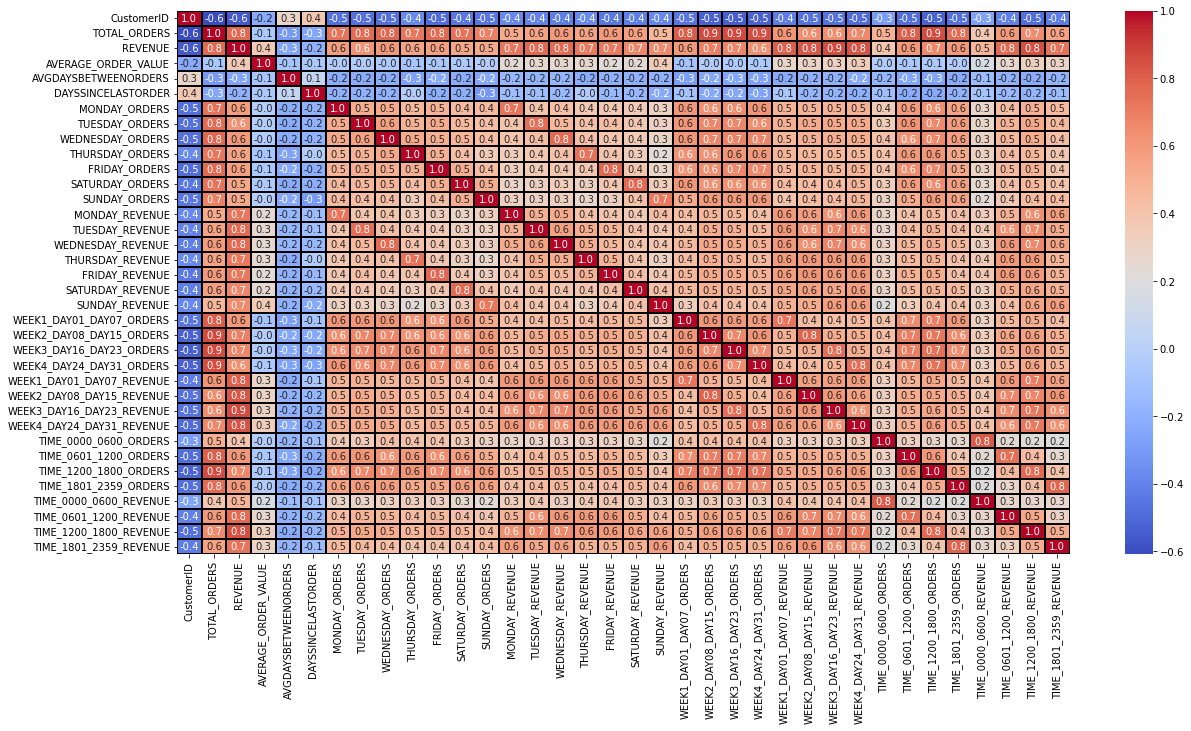

In [6]:
plt.figure(figsize=(20,10))
sns.heatmap(d.corr(),cmap='coolwarm',annot=True,fmt='.1f',linewidths=.1,linecolor='Black')
plt.show()

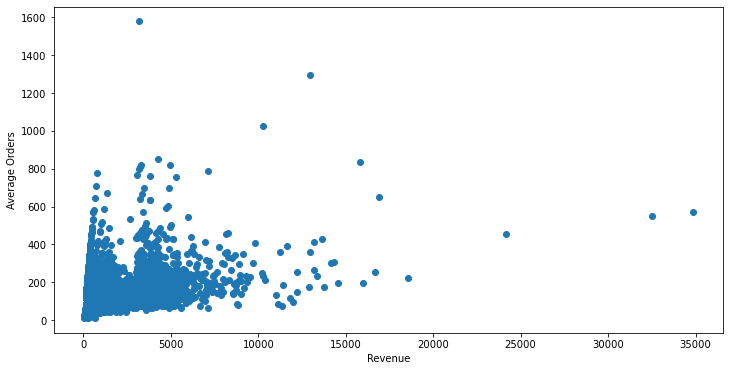

In [7]:
plt.figure(figsize=(12,6))
plt.scatter(d["REVENUE"],d["AVERAGE_ORDER_VALUE"])
plt.xlabel("Revenue")
plt.ylabel("Average Orders")
plt.show()

# Daywise Orders

In [8]:
Df1 = pd.DataFrame(zip(d.CustomerID,d.MONDAY_ORDERS,d.TUESDAY_ORDERS,d.WEDNESDAY_ORDERS,
                      d.THURSDAY_ORDERS,d.FRIDAY_ORDERS,d.SATURDAY_ORDERS,d.SUNDAY_ORDERS))
Df1.columns=['CustomerID','MONDAY_ORDERS','TUESDAY_ORDERS','WEDNESDAY_ORDERS',
            'THURSDAY_ORDERS','FRIDAY_ORDERS','SATURDAY_ORDERS','SUNDAY_ORDERS']
Df1.head(3)

,CustomerID,MONDAY_ORDERS,TUESDAY_ORDERS,WEDNESDAY_ORDERS,THURSDAY_ORDERS,FRIDAY_ORDERS,SATURDAY_ORDERS,SUNDAY_ORDERS
0,22,13,13,29,25,19,15,10
1,29,11,13,10,13,14,10,11
2,83,5,4,3,5,5,8,13


In [9]:
Df1.describe()

,CustomerID,MONDAY_ORDERS,TUESDAY_ORDERS,WEDNESDAY_ORDERS,THURSDAY_ORDERS,FRIDAY_ORDERS,SATURDAY_ORDERS,SUNDAY_ORDERS
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,40709.227800,1.629000,1.75440,1.798000,2.134000,1.94620,1.683400,1.925400
std,49949.848017,2.236506,2.43394,2.464875,2.468048,2.65268,2.449972,2.315018
min,1.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1687.500000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,13765.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000
75%,71891.500000,2.000000,3.00000,3.000000,3.000000,3.00000,3.000000,3.000000
max,277160.000000,19.000000,23.00000,29.000000,32.000000,26.00000,31.000000,23.000000


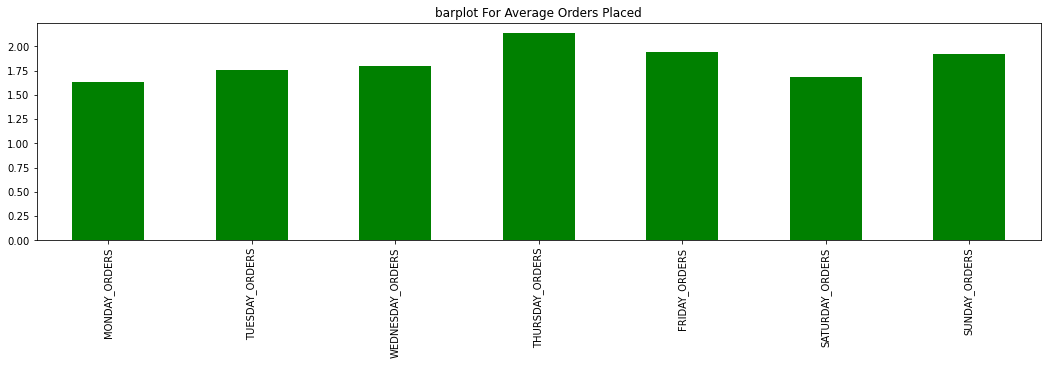

In [10]:
ax = Df1[['MONDAY_ORDERS','TUESDAY_ORDERS','WEDNESDAY_ORDERS','THURSDAY_ORDERS',
         'FRIDAY_ORDERS','SATURDAY_ORDERS','SUNDAY_ORDERS']].mean().plot(kind='bar',figsize=(18,4),color='green',
                                                                  title='barplot For Average Orders Placed')
plt.show()

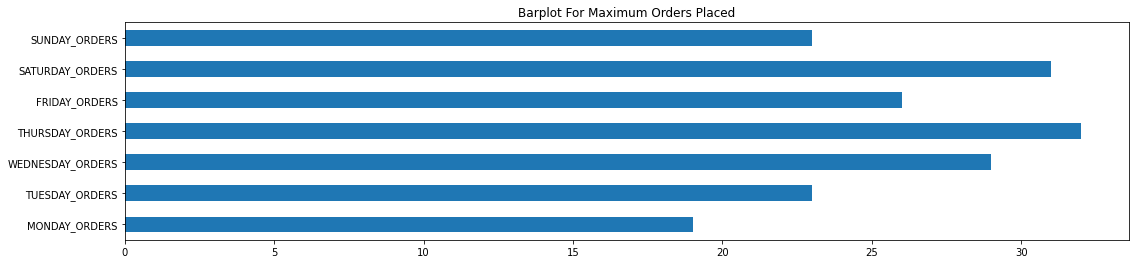

In [11]:
ax = Df1[['MONDAY_ORDERS','TUESDAY_ORDERS','WEDNESDAY_ORDERS','THURSDAY_ORDERS',
         'FRIDAY_ORDERS','SATURDAY_ORDERS','SUNDAY_ORDERS']].max().plot(kind='barh',figsize=(18,4),
                                                                  title='Barplot For Maximum Orders Placed')
plt.show()

# Daywise Revenue

In [12]:
Df2 = pd.DataFrame(zip(d.CustomerID,d.MONDAY_REVENUE,d.TUESDAY_REVENUE,d.WEDNESDAY_REVENUE,
                      d.THURSDAY_REVENUE,d.FRIDAY_REVENUE,d.SATURDAY_REVENUE,d.SUNDAY_REVENUE))
Df2.columns=['CustomerID','MONDAY_REVENUE','TUESDAY_REVENUE','WEDNESDAY_REVENUE',
            'THURSDAY_REVENUE','FRIDAY_REVENUE','SATURDAY_REVENUE','SUNDAY_REVENUE']
Df2.tail(3)

,CustomerID,MONDAY_REVENUE,TUESDAY_REVENUE,WEDNESDAY_REVENUE,THURSDAY_REVENUE,FRIDAY_REVENUE,SATURDAY_REVENUE,SUNDAY_REVENUE
4997,174004,0.0,0.0,0.0,117.49,0.0,0.0,0.0
4998,174038,0.0,0.0,0.0,117.49,0.0,0.0,0.0
4999,200783,0.0,0.0,0.0,94.14,0.0,0.0,0.0


In [13]:
Df2.describe()

,CustomerID,MONDAY_REVENUE,TUESDAY_REVENUE,WEDNESDAY_REVENUE,THURSDAY_REVENUE,FRIDAY_REVENUE,SATURDAY_REVENUE,SUNDAY_REVENUE
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,40709.227800,215.208336,233.510430,235.689294,265.949796,250.580554,219.64210,260.943330
std,49949.848017,397.831999,411.941787,397.858311,383.890024,400.543113,376.13976,406.926075
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,1687.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,13765.000000,74.990000,75.990000,80.990000,144.590000,91.195000,62.41500,135.990000
75%,71891.500000,286.865000,310.972500,319.992500,344.357500,352.740000,297.28000,341.367500
max,277160.000000,12819.410000,7853.920000,5877.440000,6434.950000,6855.220000,4642.97000,8366.350000


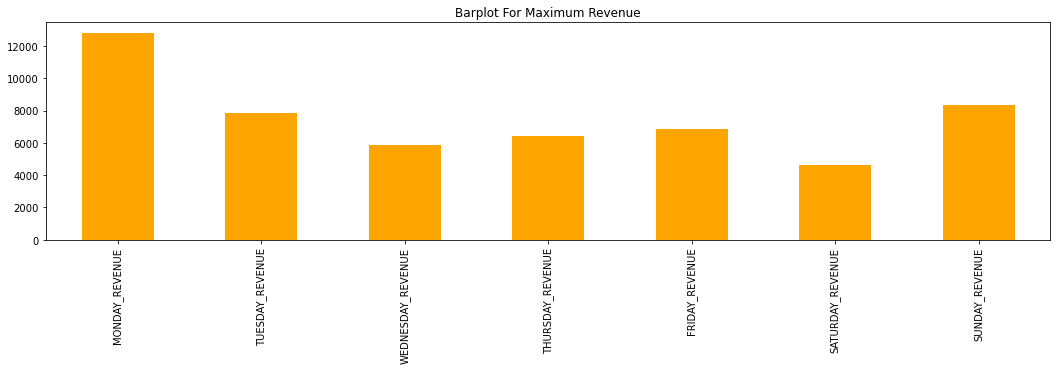

In [14]:
ax = Df2[['MONDAY_REVENUE','TUESDAY_REVENUE','WEDNESDAY_REVENUE','THURSDAY_REVENUE',
          'FRIDAY_REVENUE','SATURDAY_REVENUE','SUNDAY_REVENUE']].max().plot(kind='bar',figsize=(18,4),color='orange',
                                                                  title='Barplot For Maximum Revenue')
plt.show()

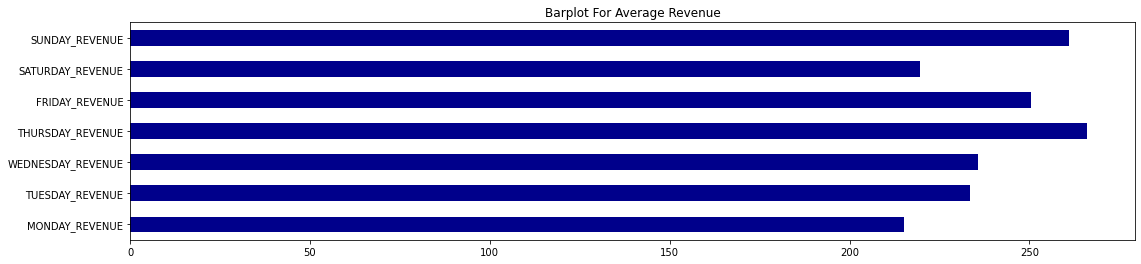

In [15]:
ax = Df2[['MONDAY_REVENUE','TUESDAY_REVENUE','WEDNESDAY_REVENUE','THURSDAY_REVENUE',
          'FRIDAY_REVENUE','SATURDAY_REVENUE','SUNDAY_REVENUE']].mean().plot(kind='barh',figsize=(18,4),color='darkblue',
                                                                  title='Barplot For Average Revenue')
plt.show()

# Weekwise Orders

In [16]:
Df3 = pd.DataFrame(zip(d.CustomerID,d.WEEK1_DAY01_DAY07_ORDERS,d.WEEK2_DAY08_DAY15_ORDERS,
                       d.WEEK3_DAY16_DAY23_ORDERS,d.WEEK4_DAY24_DAY31_ORDERS,))
Df3.columns=['CustomerID','1st WEEK_ORDERS','2nd WEEK2_ORDERS','3rd WEEK_ORDERS','4th WEEK_ORDERS']
Df3.head(3) 

,CustomerID,1st WEEK_ORDERS,2nd WEEK2_ORDERS,3rd WEEK_ORDERS,4th WEEK_ORDERS
0,22,28,42,30,24
1,29,18,19,19,26
2,83,9,11,6,17


In [17]:
Df3.describe()

,CustomerID,1st WEEK_ORDERS,2nd WEEK2_ORDERS,3rd WEEK_ORDERS,4th WEEK_ORDERS
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,40709.227800,2.99780,3.062600,3.230000,3.580000
std,49949.848017,3.25698,3.792461,3.921043,3.970384
min,1.000000,0.00000,0.000000,0.000000,0.000000
25%,1687.500000,1.00000,0.000000,0.000000,1.000000
50%,13765.000000,2.00000,2.000000,2.000000,2.000000
75%,71891.500000,4.00000,5.000000,5.000000,5.000000
max,277160.000000,32.00000,42.000000,37.000000,53.000000


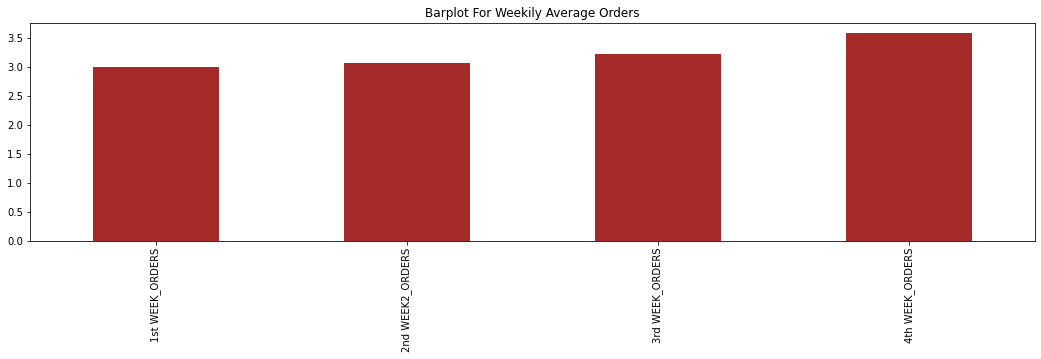

In [18]:
ax = Df3[['1st WEEK_ORDERS','2nd WEEK2_ORDERS',
          '3rd WEEK_ORDERS','4th WEEK_ORDERS']].mean().plot(kind='bar',figsize=(18,4),color='brown',
                                                            title='Barplot For Weekily Average Orders')
plt.show()

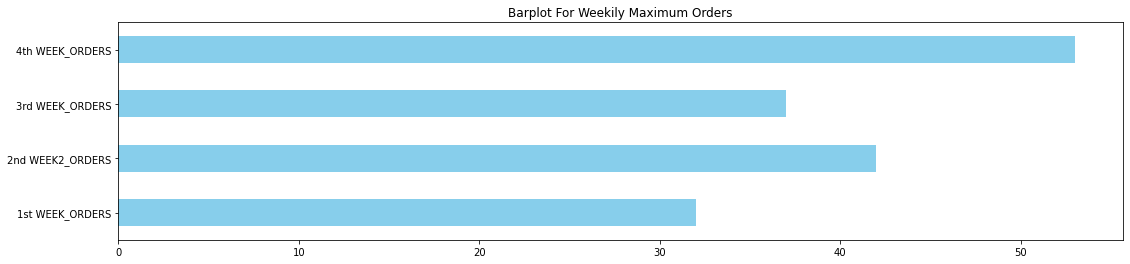

In [19]:
ax = Df3[['1st WEEK_ORDERS','2nd WEEK2_ORDERS',
          '3rd WEEK_ORDERS','4th WEEK_ORDERS']].max().plot(kind='barh',figsize=(18,4),color='skyblue',
                                                            title='Barplot For Weekily Maximum Orders')
plt.show()

# Weekwise Revenue

In [20]:
Df4 = pd.DataFrame(zip(d.CustomerID,d.WEEK1_DAY01_DAY07_REVENUE,d.WEEK2_DAY08_DAY15_REVENUE,
                       d.WEEK3_DAY16_DAY23_REVENUE,d.WEEK4_DAY24_DAY31_REVENUE,))
Df4.columns=['CustomerID','1st WEEK_REVENUE','2nd WEEK2_REVENUE','3rd WEEK_REVENUE','4th WEEK_REVENUE']
Df4.tail(3) 

,CustomerID,1st WEEK_REVENUE,2nd WEEK2_REVENUE,3rd WEEK_REVENUE,4th WEEK_REVENUE
4997,174004,117.49,0.0,0.0,0.00
4998,174038,117.49,0.0,0.0,0.00
4999,200783,44.19,0.0,0.0,49.95


In [21]:
Df4.describe()

,CustomerID,1st WEEK_REVENUE,2nd WEEK2_REVENUE,3rd WEEK_REVENUE,4th WEEK_REVENUE
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,40709.227800,378.638346,406.595734,421.826908,474.462852
std,49949.848017,515.590218,619.413277,643.449120,617.579321
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1687.500000,63.990000,0.000000,0.000000,80.000000
50%,13765.000000,190.985000,183.925000,194.990000,264.485000
75%,71891.500000,513.012500,553.462500,604.085000,651.487500
max,277160.000000,8143.650000,11303.890000,12946.220000,8274.970000


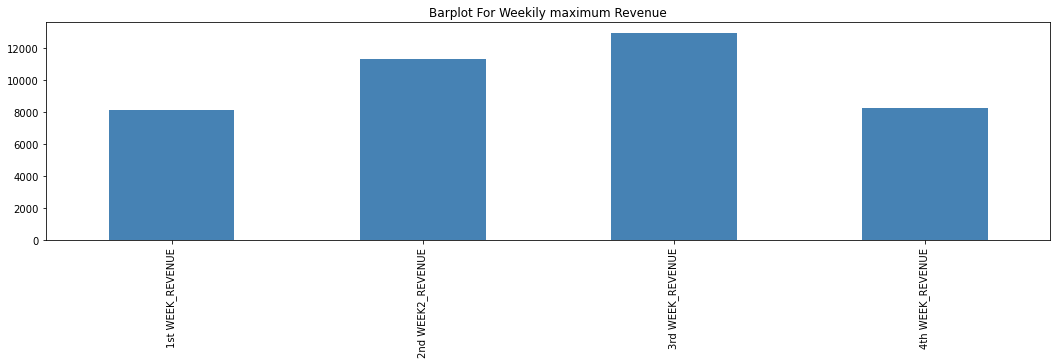

In [22]:
ax = Df4[['1st WEEK_REVENUE','2nd WEEK2_REVENUE',
          '3rd WEEK_REVENUE','4th WEEK_REVENUE']].max().plot(kind='bar',figsize=(18,4),color='steelblue',                          
                                                            title='Barplot For Weekily maximum Revenue')
plt.show()

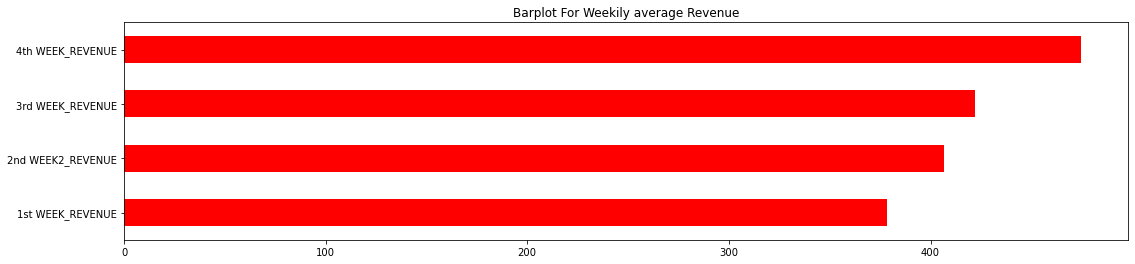

In [23]:
ax = Df4[['1st WEEK_REVENUE','2nd WEEK2_REVENUE',
          '3rd WEEK_REVENUE','4th WEEK_REVENUE']].mean().plot(kind='barh',figsize=(18,4),color='red',                          
                                                            title='Barplot For Weekily average Revenue')
plt.show()

# Timewise Placed Orders

In [24]:
Df5 = pd.DataFrame(zip(d.CustomerID,d.TIME_0000_0600_ORDERS,d.TIME_0601_1200_ORDERS,
                       d.TIME_1200_1800_ORDERS,d.TIME_1801_2359_ORDERS))
Df5.columns=['CustomerID','TIME_00:00_06:00_ORDERS','TIME_06:01_12:00_ORDERS',
             'TIME_12:01_18:00_ORDERS','TIME_18:01_23:59_ORDERS']
Df5.head(3) 

,CustomerID,TIME_00:00_06:00_ORDERS,TIME_06:01_12:00_ORDERS,TIME_12:01_18:00_ORDERS,TIME_18:01_23:59_ORDERS
0,22,12,61,37,14
1,29,1,13,24,44
2,83,0,6,12,25


In [25]:
Df5.describe()

,CustomerID,TIME_00:00_06:00_ORDERS,TIME_06:01_12:00_ORDERS,TIME_12:01_18:00_ORDERS,TIME_18:01_23:59_ORDERS
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,40709.227800,1.028800,3.746200,4.434000,3.661400
std,49949.848017,2.174331,4.700234,5.044793,4.581894
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1687.500000,0.000000,1.000000,1.000000,1.000000
50%,13765.000000,0.000000,2.000000,3.000000,2.000000
75%,71891.500000,1.000000,6.000000,7.000000,5.000000
max,277160.000000,34.000000,61.000000,58.000000,64.000000


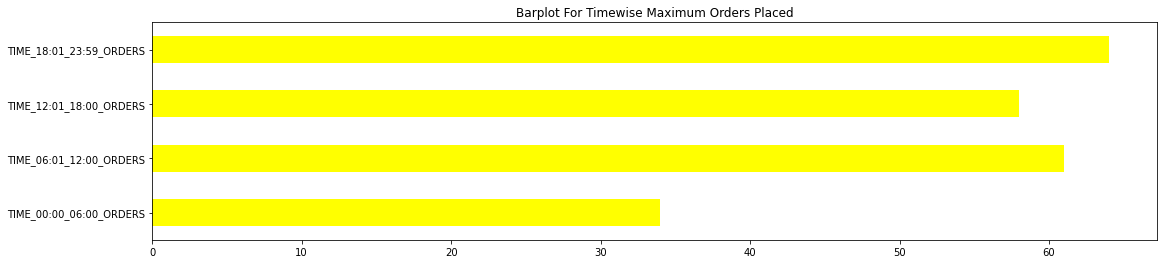

In [26]:
ax = Df5[['TIME_00:00_06:00_ORDERS','TIME_06:01_12:00_ORDERS',
          'TIME_12:01_18:00_ORDERS','TIME_18:01_23:59_ORDERS']].max().plot(kind='barh',figsize=(18,4),color='yellow',
                                                                  title='Barplot For Timewise Maximum Orders Placed')
plt.show()

# Timewise Revenue

In [27]:
Df6 = pd.DataFrame(zip(d.CustomerID,d.TIME_0000_0600_REVENUE,d.TIME_0601_1200_REVENUE,
                       d.TIME_1200_1800_REVENUE,d.TIME_1801_2359_REVENUE))
Df6.columns=['CustomerID','TIME_00:00_06:00_REVENUE','TIME_06:01_12:00_REVENUE',
             'TIME_12:01_18:00_REVENUE','TIME_18:01_23:59_REVENUE']
Df6.tail(3) 

,CustomerID,TIME_00:00_06:00_REVENUE,TIME_06:01_12:00_REVENUE,TIME_12:01_18:00_REVENUE,TIME_18:01_23:59_REVENUE
4997,174004,0.0,0.0,0.00,117.49
4998,174038,0.0,0.0,117.49,0.00
4999,200783,0.0,0.0,44.19,49.95


In [28]:
Df6.describe()

,CustomerID,TIME_00:00_06:00_REVENUE,TIME_06:01_12:00_REVENUE,TIME_12:01_18:00_REVENUE,TIME_18:01_23:59_REVENUE
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,40709.227800,131.062636,486.863868,584.731626,478.865710
std,49949.848017,331.289349,789.029911,804.290026,743.244248
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1687.500000,0.000000,35.000000,89.990000,1.000000
50%,13765.000000,0.000000,236.440000,299.840000,208.990000
75%,71891.500000,131.282500,661.952500,797.032500,620.117500
max,277160.000000,7700.240000,23832.770000,17749.010000,12995.020000


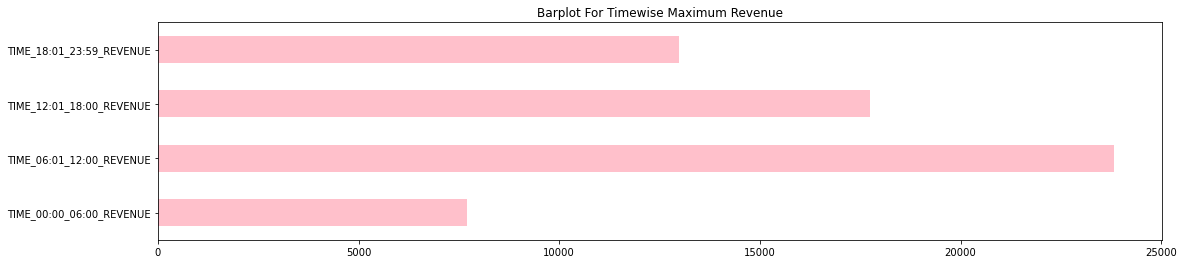

In [29]:
ax = Df6[['TIME_00:00_06:00_REVENUE','TIME_06:01_12:00_REVENUE',
          'TIME_12:01_18:00_REVENUE','TIME_18:01_23:59_REVENUE']].max().plot(kind='barh',figsize=(18,4),color='pink',
                                                                  title='Barplot For Timewise Maximum Revenue')
plt.show()

# Data Prepration For RFM Model

In [30]:
rfm = pd.DataFrame(zip(d.CustomerID,d.DAYSSINCELASTORDER,d.TOTAL_ORDERS,d.REVENUE))
rfm.columns=["CustomerID","Recency","Frequency","Monetary"]
rfm

,CustomerID,Recency,Frequency,Monetary
0,22,1,124,11986.54
1,29,1,82,11025.96
2,83,1,43,7259.69
3,95,1,44,6992.27
4,124,1,55,6263.44
...,...,...,...,...
4995,173946,207,1,117.49
4996,173987,207,1,117.49
4997,174004,207,1,117.49
4998,174038,207,1,117.49


In [31]:
rfm.describe()

,CustomerID,Recency,Frequency,Monetary
count,5000.000000,5000.000000,5000.00000,5000.000000
mean,40709.227800,87.420000,12.87040,1681.523840
std,49949.848017,80.156513,12.67988,1998.618678
min,1.000000,1.000000,1.00000,38.500000
25%,1687.500000,7.000000,3.00000,315.097500
50%,13765.000000,68.000000,8.00000,966.725000
75%,71891.500000,171.250000,20.00000,2493.072500
max,277160.000000,207.000000,156.00000,34847.400000


# Data Visualization

<AxesSubplot:xlabel='Monetary', ylabel='Count'>

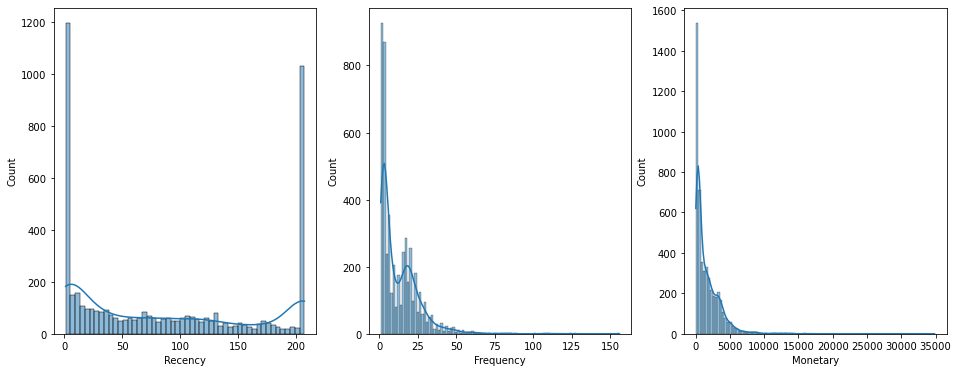

In [32]:
fig, ax = plt.subplots(1, 3, figsize=(16, 6))

# Recency distribution plot
sns.histplot(rfm['Recency'], kde=True, bins=50, ax=ax[0])

# Frequency distribution plot
sns.histplot(rfm['Frequency'], kde=True, bins=100, ax=ax[1])

# Monetary distribution plot
sns.histplot(rfm['Monetary'], kde=True, bins=100, ax=ax[2])

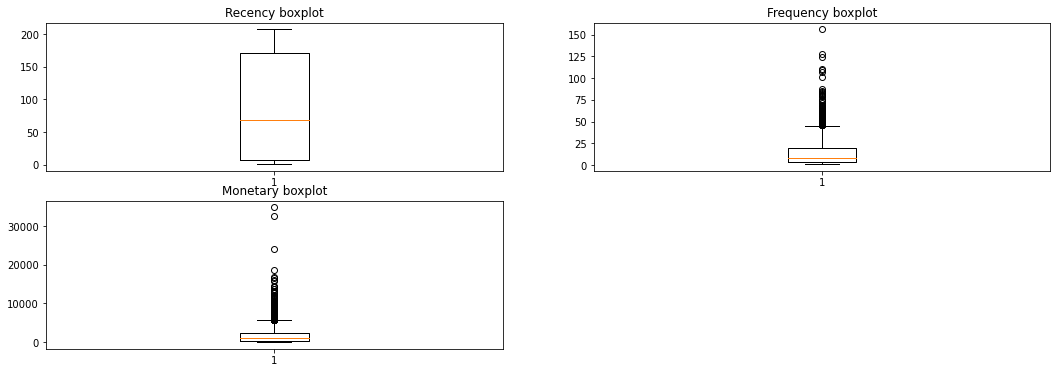

In [33]:
fig = plt.figure(figsize=(18,6))

plt.subplot(2, 2, 1)
plt.title('Recency boxplot')
plt.boxplot(rfm['Recency'])

plt.subplot(2, 2, 2)
plt.title('Frequency boxplot')
plt.boxplot(rfm['Frequency'])

plt.subplot(2, 2, 3)
plt.title('Monetary boxplot')
plt.boxplot(rfm['Monetary'])
plt.show()

# RFM Model

In [34]:
# Create the quartiles scores
quantiles = rfm.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
    
def RFMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
rfm['R'] = rfm['Recency'].apply(RFMScore, args=('Recency',quantiles,))
rfm['F'] = rfm['Frequency'].apply(RFMScore, args=('Frequency',quantiles,))
rfm['M'] = rfm['Monetary'].apply(RFMScore, args=('Monetary',quantiles,))

In [35]:
# Concat RFM quartile values to create RFM Segments
def join_rfm(x): return str(x['R']) + str(x['F']) + str(x['M'])
rfm['RFM_Segment'] = rfm.apply(join_rfm, axis=1)


# Calculate RFM_Score
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)

In [36]:
# Create human friendly RFM labels
segt_map = {
    r'[1-2][1-2]': 'Require Activation',
    r'[1-2][2-3]': 'Needs Attention',
    r'[1-2]4': 'Promising',
    r'[2-3][3-4]': 'Potential',
    r'31': 'Loyal',
    r'41': 'New customers',
    r'[3-4][1-2]': 'Champions',
    r'4[3-4]': "Can't Loose Them"
}


rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)

In [37]:
# Create some human friendly labels for the scores
rfm['Score'] = 'Green'
rfm.loc[rfm['RFM_Score']>5,'Score'] = 'Bronze' 
rfm.loc[rfm['RFM_Score']>7,'Score'] = 'Silver' 
rfm.loc[rfm['RFM_Score']>9,'Score'] = 'Gold' 
rfm.loc[rfm['RFM_Score']>10,'Score'] = 'Platinum'

# List the head of the table to view the 
rfm

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,Segment,Score
0,22,1,124,11986.54,1,4,4,1.04.04.0,9,Promising,Silver
1,29,1,82,11025.96,1,4,4,1.04.04.0,9,Promising,Silver
2,83,1,43,7259.69,1,4,4,1.04.04.0,9,Promising,Silver
3,95,1,44,6992.27,1,4,4,1.04.04.0,9,Promising,Silver
4,124,1,55,6263.44,1,4,4,1.04.04.0,9,Promising,Silver
...,...,...,...,...,...,...,...,...,...,...,...
4995,173946,207,1,117.49,4,1,1,4.01.01.0,6,New customers,Bronze
4996,173987,207,1,117.49,4,1,1,4.01.01.0,6,New customers,Bronze
4997,174004,207,1,117.49,4,1,1,4.01.01.0,6,New customers,Bronze
4998,174038,207,1,117.49,4,1,1,4.01.01.0,6,New customers,Bronze


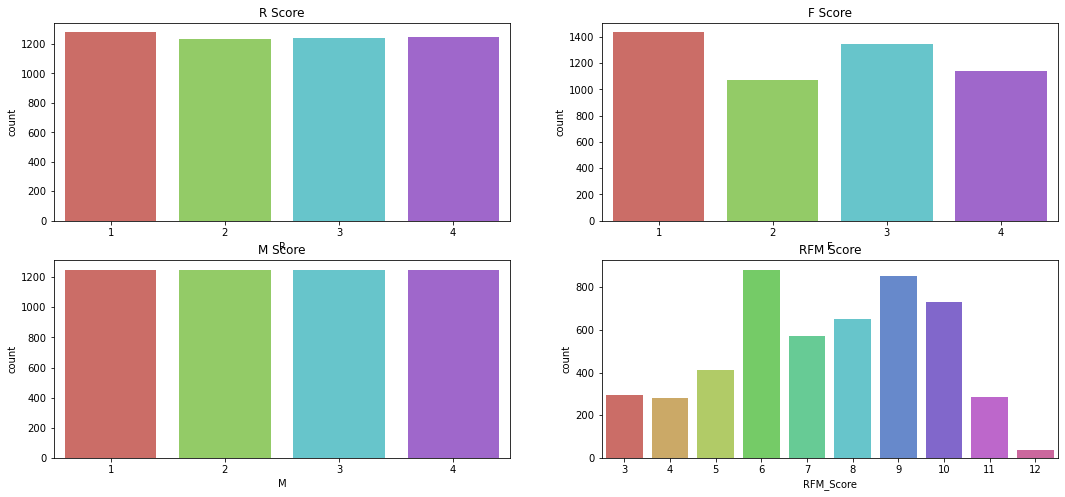

In [38]:
fig = plt.figure(figsize=(18,8))

plt.subplot(2, 2, 1)
plt.title("R Score")
sns.countplot(rfm['R'], data= rfm,
              palette='hls')

plt.subplot(2, 2, 2)
plt.title("F Score")
sns.countplot(rfm['F'], data= rfm,
              palette='hls')

plt.subplot(2, 2, 3)
plt.title("M Score")
sns.countplot(rfm['M'], data= rfm,
              palette='hls')

plt.subplot(2, 2, 4)
plt.title("RFM Score")
sns.countplot(rfm['RFM_Score'], data= rfm,
              palette='hls')

plt.show()

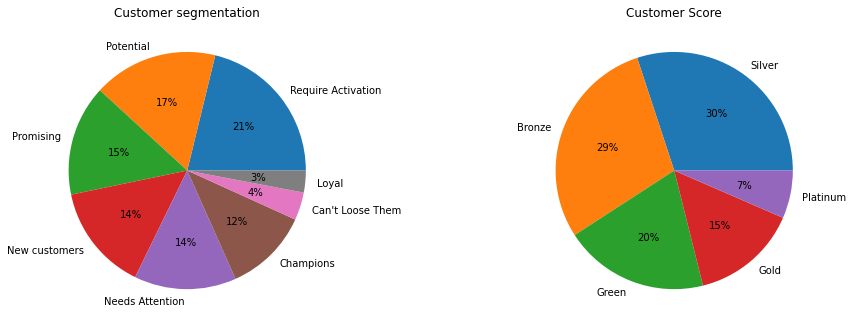

In [39]:
plt.figure(figsize=(16,12))

plt.subplot(2, 2, 1)
plt.title("Customer segmentation")
plt.pie(rfm.Segment.value_counts(),labels=rfm.Segment.value_counts().index,autopct='%.0f%%')

plt.subplot(2, 2, 2)
plt.title("Customer Score")
plt.pie(rfm.Score.value_counts(),labels=rfm.Score.value_counts().index,autopct='%.0f%%')
plt.show()

# K-Means Cluster

In [40]:
rfm1 = pd.DataFrame(zip(d.CustomerID,d.DAYSSINCELASTORDER,d.TOTAL_ORDERS,d.REVENUE))
rfm1.columns=["CustomerID","Recency","Frequency","Monetary"]
rfm1

,CustomerID,Recency,Frequency,Monetary
0,22,1,124,11986.54
1,29,1,82,11025.96
2,83,1,43,7259.69
3,95,1,44,6992.27
4,124,1,55,6263.44
...,...,...,...,...
4995,173946,207,1,117.49
4996,173987,207,1,117.49
4997,174004,207,1,117.49
4998,174038,207,1,117.49


In [41]:
rfm2=rfm1.drop(['CustomerID'],axis=1)
rfm2

,Recency,Frequency,Monetary
0,1,124,11986.54
1,1,82,11025.96
2,1,43,7259.69
3,1,44,6992.27
4,1,55,6263.44
...,...,...,...
4995,207,1,117.49
4996,207,1,117.49
4997,207,1,117.49
4998,207,1,117.49


In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

st = StandardScaler()
model = st.fit_transform(rfm2)

In [43]:
model

array([[-1.07824854,  8.76512346,  5.15658486],
       [-1.07824854,  5.45245802,  4.67591484],
       [-1.07824854,  2.37641154,  2.79128987],
       ...,
       [ 1.49198056, -0.9362539 , -0.78263567],
       [ 1.49198056, -0.9362539 , -0.78263567],
       [ 1.49198056, -0.85738091, -0.79431991]])

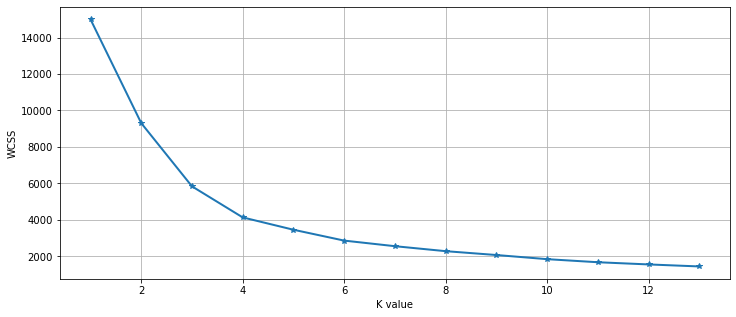

In [44]:
WCSS = []
for k in range(1,14):
    kmeans = KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(model)
    WCSS.append(kmeans.inertia_)

plt.figure(figsize=(12,5))
plt.grid()
plt.plot(range(1,14),WCSS, linewidth=2,marker='*')
plt.xlabel('K value')
plt.ylabel('WCSS')
plt.show()

In [45]:
kmeans = KMeans(n_clusters=4)

label = kmeans.fit_predict(model)
label

array([3, 3, 3, ..., 1, 1, 1])

In [46]:
kmeans.cluster_centers_

array([[-0.34314509,  0.71406771,  0.5842908 ],
       [ 1.24522165, -0.62969191, -0.5597155 ],
       [-0.88414638, -0.58049097, -0.52630645],
       [-0.35627786,  2.74413019,  2.90070939]])

In [47]:
rfm1['Cluster']= kmeans.labels_
rfm1

,CustomerID,Recency,Frequency,Monetary,Cluster
0,22,1,124,11986.54,3
1,29,1,82,11025.96,3
2,83,1,43,7259.69,3
3,95,1,44,6992.27,3
4,124,1,55,6263.44,3
...,...,...,...,...,...
4995,173946,207,1,117.49,1
4996,173987,207,1,117.49,1
4997,174004,207,1,117.49,1
4998,174038,207,1,117.49,1


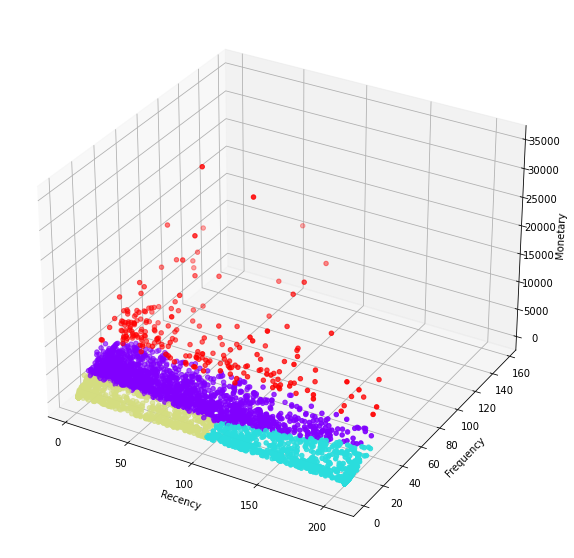

In [48]:
plt.figure(figsize=(18,10))
ax = plt.axes(projection='3d')
ax.scatter3D(rfm1['Recency'],rfm1['Frequency'],rfm1['Monetary'],
             c= rfm1['Cluster'],
             cmap='rainbow')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary');

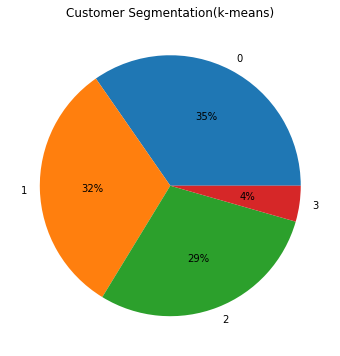

In [49]:
plt.figure(figsize=(6,6))
plt.title("Customer Segmentation(k-means)")
plt.pie(rfm1.Cluster.value_counts(),labels=rfm1.Cluster.value_counts().index,autopct='%.0f%%')
plt.show()